In [10]:
import pandas as pd
from pycaret.classification import *

In [11]:
# Retrieve Training and Testing Data 
df_train = pd.read_csv('data/trainClean.csv')
df_test = pd.read_csv('data/testClean.csv')

#Define Catergorical and Numerical features
cat_features = ['HomePlanet', 'CryoSleep', 'Deck', 'Side', 'Destination', 'VIP', 'FirstName', 'LastName']
num_features = ['PassengerId', 'RoomService', 'Num', 'FoodCourt', 'ShoppingMall', 'Age', 'Spa', 'VRDeck']

#PassengerId	HomePlanet	CryoSleep	Deck	Num	Side	Destination	Age	VIP	RoomService	FoodCourt	ShoppingMall	FirstName	LastName	Spa	VRDeck	Transported

,Description,Value
0,Session id,2686
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 17)"
4,Transformed data shape,"(8693, 37)"
5,Transformed train set shape,"(6085, 37)"
6,Transformed test set shape,"(2608, 37)"
7,Numeric features,8
8,Categorical features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8140,0.9003,0.8176,0.8139,0.8156,0.6279,0.6281,0.6530
lightgbm,Light Gradient Boosting Machine,0.8108,0.8974,0.8046,0.8171,0.8107,0.6217,0.6220,0.1210
rf,Random Forest Classifier,0.8038,0.8879,0.7602,0.8354,0.7960,0.6078,0.6104,0.1050
gbc,Gradient Boosting Classifier,0.8010,0.8927,0.8215,0.7913,0.8059,0.6018,0.6027,0.1700
et,Extra Trees Classifier,0.7901,0.8752,0.7419,0.8240,0.7807,0.5806,0.5836,0.0810
ada,Ada Boost Classifier,0.7869,0.8739,0.8176,0.7724,0.7943,0.5735,0.5747,0.0600
lr,Logistic Regression,0.7716,0.8118,0.8852,0.7234,0.7961,0.5423,0.5569,0.3900
lda,Linear Discriminant Analysis,0.7611,0.8506,0.7005,0.8002,0.7469,0.5225,0.5268,0.0240
ridge,Ridge Classifier,0.7607,0.0000,0.7005,0.7996,0.7466,0.5219,0.5261,0.0220
dt,Decision Tree Classifier,0.7395,0.7395,0.7426,0.7409,0.7416,0.4790,0.4792,0.0250


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7750,0.8716,0.7622,0.7852,0.7736,0.5502,0.5504
1,0.8177,0.9018,0.8339,0.8101,0.8218,0.6354,0.6356
2,0.8194,0.8981,0.8143,0.8251,0.8197,0.6388,0.6388
3,0.8292,0.9030,0.8176,0.8395,0.8284,0.6585,0.6587
4,0.8046,0.8831,0.7980,0.8113,0.8046,0.6092,0.6093
5,0.7977,0.8808,0.7843,0.8081,0.7960,0.5955,0.5957
6,0.8174,0.8872,0.8039,0.8283,0.8159,0.6349,0.6352
7,0.8010,0.8924,0.8235,0.7900,0.8064,0.6018,0.6024
8,0.8076,0.8953,0.7876,0.8225,0.8047,0.6152,0.6158


[I 2023-11-20 17:30:15,325] Searching the best hyperparameters using 6085 samples...
[I 2023-11-20 17:30:57,116] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


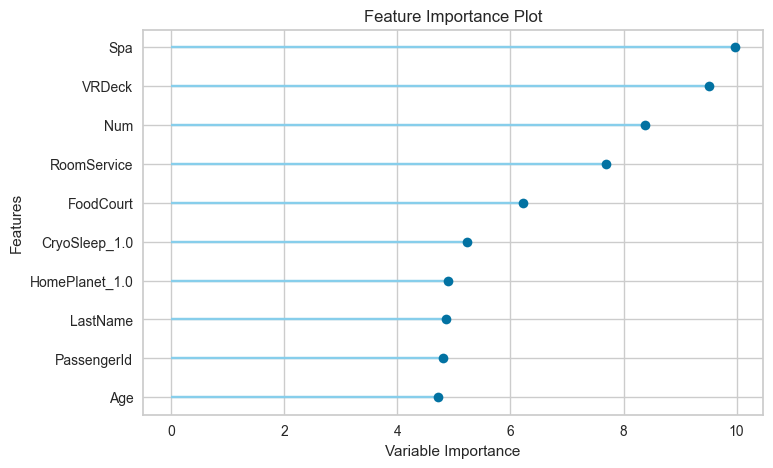

In [12]:
#Setup PyCaret with training dataset, target variable, and categorical and numerical features
test = setup(df_train, target='Transported', categorical_features=cat_features, numeric_features=num_features)

#Compare different models accuracy on given dataset
best_model= compare_models()

#Example Logistic Regression
#lr_model = create_model('lr')
#tuned_lr = tune_model(lr_model, n_iter=10, search_library='optuna', search_algorithm='tpe', choose_better = True)

#Tuner hyperparameters by passing the best model found for the particular dataset, number of iterations, and the search method you want to use
#Increase number of iterations to make the search run longer and increase accuracy
tuned_model = tune_model(best_model, n_iter=10, search_library='optuna', search_algorithm='tpe', choose_better = True)

# plot feature importance
plot_model(best_model, plot = 'feature')